In [1]:
# Importing necessary libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Ignoring deprecation warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading the csv
data = pd.read_csv('news_data.csv')
data.head()

,text,category
0,There Were 2 Mass Shootings In Texas Last Week...,CRIME
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT
2,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT
4,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT


In [3]:
# Counting no. of data for each genre
data['category'].value_counts()

POLITICS          32739
WELLNESS          17827
ENTERTAINMENT     16058
TRAVEL             9887
STYLE & BEAUTY     9649
PARENTING          8677
HEALTHY LIVING     6694
QUEER VOICES       6314
WORLDPOST          6243
FOOD & DRINK       6226
BUSINESS           5937
COMEDY             5175
SPORTS             4884
BLACK VOICES       4528
HOME & LIVING      4195
PARENTS            3955
WEDDINGS           3651
WOMEN              3490
IMPACT             3459
DIVORCE            3426
CRIME              3405
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
RELIGION           2556
STYLE              2254
SCIENCE            2178
WORLD NEWS         2177
TASTE              2096
TECH               2082
MONEY              1707
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
ARTS & CULTURE     1339
ENVIRONMENT        1323
COLLEGE            1144
LATINO VOICES      1129
CULTURE & ARTS     1030
EDUCATION          1004
Name: category, dtype: int64

In [4]:
# Data cleanup
data['category'] = data['category'].replace({'CULTURE & ARTS' : 'ARTS & CULTURE', 'ARTS' : 'ARTS & CULTURE', 
                                             'COLLEGE' : 'EDUCATION',
                                             'PARENTS' : 'PARENTING',
                                             'MONEY' : 'BUSINESS', 
                                             'STYLE' : 'TRAVEL & LIFESTYLE', 'STYLE & BEAUTY' : 'TRAVEL & LIFESTYLE', 'TASTE' : 'TRAVEL & LIFESTYLE', 'FOOD & DRINK' : 'TRAVEL & LIFESTYLE','FIFTY' : 'TRAVEL & LIFESTYLE', 'TRAVEL' : 'TRAVEL & LIFESTYLE',
                                             'DIVORCE' : 'MARRIAGE', 'WEDDINGS' : 'MARRIAGE', 
                                             'HEALTHY LIVING' : 'TRAVEL & LIFESTYLE', 'WELLNESS' : 'TRAVEL & LIFESTYLE',
                                             'GREEN' :  'ENVIRONMENT',
                                             'SCIENCE' : 'SCIENCE & TECH', 'TECH' : 'SCIENCE & TECH',  
                                             'COMEDY' : 'HUMOUR', 'WEIRD NEWS' : 'HUMOUR',
                                             'QUEER VOICES': 'VOICES AROUND THE WORLD', 'BLACK VOICES': 'VOICES AROUND THE WORLD', 'LATINO VOICES': 'VOICES AROUND THE WORLD',
                                             'WORLDPOST' : 'NEWS & POLITICS', 'IMPACT' : 'NEWS & POLITICS', 'GOOD NEWS' : 'NEWS & POLITICS', 'POLITICS' : 'NEWS & POLITICS', 'WORLD NEWS' : 'NEWS & POLITICS', 'WOMEN' : 'NEWS & POLITICS', 'CRIME' : 'NEWS & POLITICS', 'MEDIA' : 'NEWS & POLITICS'})
data['category'].value_counts()

TRAVEL & LIFESTYLE         56034
NEWS & POLITICS            55726
ENTERTAINMENT              16058
PARENTING                  12632
VOICES AROUND THE WORLD    11971
HUMOUR                      7845
BUSINESS                    7644
MARRIAGE                    7077
SPORTS                      4884
SCIENCE & TECH              4260
HOME & LIVING               4195
ENVIRONMENT                 3945
ARTS & CULTURE              3878
RELIGION                    2556
EDUCATION                   2148
Name: category, dtype: int64

In [5]:
# Filtering out unncessary information from given text
import string
from nltk.corpus import stopwords
from textblob import Word

stop = stopwords.words('english')
newStopWord = ['like','yet','one']
stop.extend(newStopWord)

# Removing punctuations and all digits from text
filterString = string.punctuation + '“”|”' + string.digits
data['FilterText'] = data['text'].apply(lambda x: x.translate(str.maketrans(filterString,' '*len(filterString),'')))

# Removing all single characters
data['FilterText'] = data['FilterText'].replace('\s+[a-zA-Z]\s+', ' ', regex=True)

# Removing single characters in beginning
data['FilterText'] = data['FilterText'].replace('\^[a-zA-Z]\s+', ' ', regex=True)

# Removing multiple spaces
data['FilterText'] = data['FilterText'].replace('\s+', ' ', regex=True)

# Converting text to lowercase
data['FilterText'] = data['FilterText'].apply(lambda x: x.lower())

# Removing stop words from text
data['FilterText'] = data['FilterText'].str.split(' ').apply(lambda x: ' '.join(k for k in x if k not in stop))

# Lemmatizing all words in the text
data['FilterText'] = data['FilterText'].apply(lambda x: "".join([Word(word).lemmatize() for word in x]))

data.head()

,text,category,FilterText
0,There Were 2 Mass Shootings In Texas Last Week...,NEWS & POLITICS,mass shootings texas last week tv left husband...
1,Will Smith Joins Diplo And Nicky Jam For The 2...,ENTERTAINMENT,smith joins diplo nicky jam world cup official...
2,Hugh Grant Marries For The First Time At Age 5...,ENTERTAINMENT,hugh grant marries first time age actor longti...
3,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,ENTERTAINMENT,jim carrey blasts castrato adam schiff democra...
4,Julianna Margulies Uses Donald Trump Poop Bags...,ENTERTAINMENT,julianna margulies uses donald trump poop bags...


In [6]:
# Visualizing top words from each category
from wordcloud import WordCloud
from ipywidgets import interact

category_list = ['ARTS & CULTURE', 'EDUCATION', 'PARENTING', 'BUSINESS', 'TRAVEL & LIFESTYLE', 'MARRIAGE', 'ENVIRONMENT', 'SCIENCE & TECH', 'HUMOUR', 'VOICES AROUND THE WORLD', 'NEWS & POLITICS']
# Generating wordcloud for visualization of highly recurring words for each category
@interact
def plot_word_cloud(category=category_list):
    
    sample_data = data[data['category'] == category]
    text = ' '.join(sample_data['FilterText'].tolist())
    wordcloud = WordCloud(max_font_size=60, stopwords=stop).generate(text)
        
    plt.figure(figsize=(12,12))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title('WordCloud for {}'.format(category))

interactive(children=(Dropdown(description='category', options=('ARTS & CULTURE', 'EDUCATION', 'PARENTING', 'B…

In [7]:
# Spliting data into test, train and validation set
from sklearn.model_selection import train_test_split

# Defining X and y for the data
X = data['FilterText']
y = data['category']

text_train, text_test, category_train, category_test = train_test_split(X,y)
text_train, text_validate, category_train, category_validate = train_test_split(text_train,category_train)
print("Training: ",len(text_train))
print("Validation: ",len(text_validate),)
print("Testing: ",len(text_test))

Training:  112979
Validation:  37660
Testing:  50214


In [8]:
# Feature extraction while tokenizing
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r"\w+")
stop_words = stop
vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize, stop_words=stop_words)

vectorizer.fit(iter(text_train))
X_train = vectorizer.transform(iter(text_train))
X_validate = vectorizer.transform(iter(text_validate))
X_test = vectorizer.transform(iter(text_test))

In [9]:
# Label encoding the categorical variables
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(category_train)
Y_train = encoder.transform(category_train)
Y_validate = encoder.transform(category_validate)
Y_test = encoder.transform(category_test)

In [10]:
# Function for reversing a sentence
reverse_vocabulary = {}
vocabulary = vectorizer.vocabulary_
for word in vocabulary:
    index = vocabulary[word]
    reverse_vocabulary[index] = word

In [12]:
## Feature Reduction process can be implemented but gives worse performance

import copy
# from sklearn.feature_selection import VarianceThreshold

# print("Number of features before reduction : ", X_train.shape[1])
# selection = VarianceThreshold(threshold=0.0001)
X_train_whole = copy.deepcopy(X_train)
Y_train_whole = copy.deepcopy(Y_train)
# selection.fit(X_train)
# X_train = selection.transform(X_train)
# X_validate = selection.transform(X_validate)
# X_test = selection.transform(X_test)
# print("Number of features after reduction : ", X_train.shape[1])

In [13]:
# Training and fitting the model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

nb = MultinomialNB()
nb.fit(X_train, Y_train)
predMNB = nb.predict(X_validate)
print(classification_report(Y_validate, predMNB, target_names=encoder.classes_))

                         precision    recall  f1-score   support

         ARTS & CULTURE       0.76      0.21      0.33       677
               BUSINESS       0.62      0.37      0.46      1460
              EDUCATION       0.66      0.06      0.10       368
          ENTERTAINMENT       0.61      0.70      0.65      2997
            ENVIRONMENT       0.65      0.23      0.34       756
          HOME & LIVING       0.88      0.40      0.55       835
                 HUMOUR       0.63      0.22      0.33      1442
               MARRIAGE       0.85      0.63      0.72      1306
        NEWS & POLITICS       0.70      0.85      0.77     10477
              PARENTING       0.61      0.66      0.64      2384
               RELIGION       0.85      0.13      0.22       497
         SCIENCE & TECH       0.81      0.24      0.38       813
                 SPORTS       0.85      0.45      0.59       964
     TRAVEL & LIFESTYLE       0.68      0.88      0.77     10454
VOICES AROUND THE WORLD 

                         precision    recall  f1-score   support

         ARTS & CULTURE       0.76      0.21      0.32       881
               BUSINESS       0.65      0.39      0.49      1951
              EDUCATION       0.68      0.06      0.10       542
          ENTERTAINMENT       0.61      0.70      0.65      4001
            ENVIRONMENT       0.59      0.23      0.33       968
          HOME & LIVING       0.88      0.41      0.56      1041
                 HUMOUR       0.63      0.24      0.35      1979
               MARRIAGE       0.86      0.62      0.72      1796
        NEWS & POLITICS       0.71      0.85      0.77     13908
              PARENTING       0.61      0.64      0.62      3146
               RELIGION       0.79      0.11      0.20       637
         SCIENCE & TECH       0.76      0.22      0.34      1081
                 SPORTS       0.85      0.47      0.60      1247
     TRAVEL & LIFESTYLE       0.68      0.88      0.77     14034
VOICES AROUND THE WORLD 

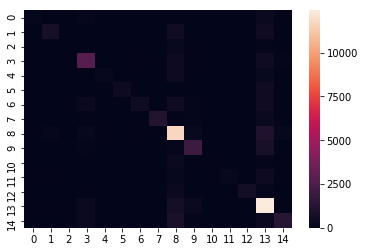

In [14]:
# Testing model on the test set
import seaborn as sns
from sklearn.metrics import confusion_matrix

pred = nb.predict(X_test)
print(classification_report(Y_test, pred, target_names=encoder.classes_))
sns.heatmap(confusion_matrix(Y_test, pred))

## Why I chose Multinomial Naive Bayes?

Among all the models that I tried, Multinomial Naive Bayes and Logistic Regression seemed to perform considerably better than the other models. Although both Multinomial Naive Bayes and Logistic Regression output similar precision value, the recall value in Multinomial Naive Bayes is slightly higher. 
In order to see why Multinomial Naive Bayes gives better result than the others, I have printed out top 20 words for each category based on their respective weights after getting all the co-efficients of the features in the following cell. It can be easily observed that the top 20 words are very closely related to the category it belongs to. Hence Multinomial Naive Bayes seems to perform well on the given data.

In [15]:
# Top 20 words from each category

nb1 = MultinomialNB()
nb1.fit(X_train_whole, Y_train_whole)
coefs = nb1.coef_
target_names = encoder.classes_

for i in range(len(target_names)):
    words = []
    for j in coefs[i].argsort()[-20:]:
        words.append(reverse_vocabulary[j])
    print (target_names[i], '-', words, "\n")

ARTS & CULTURE - ['museum', 'two', 'arts', 'us', 'people', 'years', 'life', 'year', 'book', 'first', 'time', 'women', 'show', 'work', 'artists', 'world', 'photos', 'artist', 'new', 'art'] 

BUSINESS - ['day', 'could', 'years', 'many', 'world', 'financial', 'wall', 'credit', 'company', 'tax', 'women', 'make', 'work', 'year', 'get', 'money', 'people', 'time', 'new', 'business'] 

EDUCATION - ['teacher', 'children', 'know', 'sexual', 'colleges', 'many', 'high', 'people', 'teachers', 'campus', 'public', 'time', 'new', 'schools', 'university', 'student', 'school', 'education', 'students', 'college'] 

ENTERTAINMENT - ['life', 'watch', 'video', 'season', 'people', 'get', 'back', 'best', 'love', 'music', 'time', 'says', 'year', 'movie', 'trump', 'first', 'film', 'show', 'star', 'new'] 

ENVIRONMENT - ['day', 'last', 'global', 'could', 'video', 'california', 'time', 'oil', 'year', 'energy', 'dog', 'people', 'water', 'photos', 'animal', 'world', 'week', 'new', 'change', 'climate'] 

HOME & LIVI